## Using VggNET

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
train_path = '/Users/krish/Dataset/dataset/train'
test_path = '/Users/krish/Dataset/dataset/test'
BATCH_SIZE = 10

In [3]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True
).flow_from_directory(
    directory=train_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 5501 images belonging to 6 classes.
Found 1384 images belonging to 6 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=('relu'), input_shape=(20, 20, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation=('relu')))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation=('relu')))
model.add(Dense(128, activation=('relu')))
model.add(Dense(6, activation=('softmax')))
#evaluating the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_batches, epochs=17)

Epoch 1/17
551/551 [==============================] - 30s 42ms/step - loss: 0.4479 - accuracy: 0.8069
Epoch 2/17
551/551 [==============================] - 17s 30ms/step - loss: 0.2359 - accuracy: 0.9057
Epoch 3/17
551/551 [==============================] - 17s 31ms/step - loss: 0.1711 - accuracy: 0.9344
Epoch 4/17
551/551 [==============================] - 18s 32ms/step - loss: 0.1486 - accuracy: 0.9449
Epoch 5/17
551/551 [==============================] - 18s 34ms/step - loss: 0.1349 - accuracy: 0.9464
Epoch 6/17
551/551 [==============================] - 19s 34ms/step - loss: 0.1049 - accuracy: 0.9566
Epoch 7/17
551/551 [==============================] - 19s 34ms/step - loss: 0.1051 - accuracy: 0.9595
Epoch 8/17
551/551 [==============================] - 18s 33ms/step - loss: 0.0865 - accuracy: 0.9667
Epoch 9/17
551/551 [==============================] - 21s 39ms/step - loss: 0.0880 - accuracy: 0.9660
Epoch 10/17
551/551 [==============================] - 21s 38ms/step - loss: 0.064

### VggNet Evaluation

In [5]:
model.evaluate(test_batches)

139/139 [==============================] - 6s 41ms/step - loss: 0.0450 - accuracy: 0.9841


[0.04496585950255394, 0.9841040372848511]

# Using ResNET

In [6]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True
).flow_from_directory(
    directory=train_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 5501 images belonging to 6 classes.
Found 1384 images belonging to 6 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=('relu'), input_shape=(20, 20, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation=('relu')))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation=('relu')))
model.add(Dense(128, activation=('relu')))
model.add(Dense(6, activation=('softmax')))
#evaluating the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_batches, epochs=17)

Epoch 1/17
551/551 [==============================] - 16s 29ms/step - loss: 0.4708 - accuracy: 0.7946
Epoch 2/17
551/551 [==============================] - 19s 34ms/step - loss: 0.2319 - accuracy: 0.9095
Epoch 3/17
551/551 [==============================] - 19s 35ms/step - loss: 0.1868 - accuracy: 0.9255
Epoch 4/17
551/551 [==============================] - 20s 36ms/step - loss: 0.1558 - accuracy: 0.9380
Epoch 5/17
551/551 [==============================] - 18s 32ms/step - loss: 0.1328 - accuracy: 0.9456
Epoch 6/17
551/551 [==============================] - 18s 32ms/step - loss: 0.1249 - accuracy: 0.9513
Epoch 7/17
551/551 [==============================] - 18s 32ms/step - loss: 0.1028 - accuracy: 0.9629
Epoch 8/17
551/551 [==============================] - 18s 32ms/step - loss: 0.1055 - accuracy: 0.9631
Epoch 9/17
551/551 [==============================] - 18s 32ms/step - loss: 0.0830 - accuracy: 0.9682
Epoch 10/17
551/551 [==============================] - 18s 33ms/step - loss: 0.077

### ResNet evaluation

In [8]:
model.evaluate(test_batches)

139/139 [==============================] - 5s 34ms/step - loss: 0.0483 - accuracy: 0.9812


[0.04829622432589531, 0.9812138676643372]

## Using NasNet

In [25]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.nasnet.preprocess_input,
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True
).flow_from_directory(
    directory=train_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.nasnet.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 5501 images belonging to 6 classes.
Found 1384 images belonging to 6 classes.


In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=('relu'), input_shape=(20, 20, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation=('relu')))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation=('relu')))
model.add(Dense(128, activation=('relu')))
model.add(Dense(6, activation=('softmax')))
#evaluating the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_batches, epochs=17)

Epoch 1/17
551/551 [==============================] - 37s 61ms/step - loss: 1.0399 - accuracy: 0.4506
Epoch 2/17
551/551 [==============================] - 22s 39ms/step - loss: 0.7280 - accuracy: 0.6375
Epoch 3/17
551/551 [==============================] - 21s 38ms/step - loss: 0.5756 - accuracy: 0.7377
Epoch 4/17
551/551 [==============================] - 22s 39ms/step - loss: 0.4622 - accuracy: 0.8044
Epoch 5/17
551/551 [==============================] - 23s 42ms/step - loss: 0.3744 - accuracy: 0.8431
Epoch 6/17
551/551 [==============================] - 21s 38ms/step - loss: 0.2990 - accuracy: 0.8802
Epoch 7/17
551/551 [==============================] - 22s 41ms/step - loss: 0.2502 - accuracy: 0.9035
Epoch 8/17
551/551 [==============================] - 23s 42ms/step - loss: 0.2162 - accuracy: 0.9166
Epoch 9/17
551/551 [==============================] - 22s 39ms/step - loss: 0.2063 - accuracy: 0.9178
Epoch 10/17
551/551 [==============================] - 26s 48ms/step - loss: 0.198

### NasNet evaluation

In [27]:
model.evaluate(test_batches)

139/139 [==============================] - 6s 37ms/step - loss: 0.1606 - accuracy: 0.9379


[0.16064754128456116, 0.9378612637519836]

## Using Xception

In [28]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True
).flow_from_directory(
    directory=train_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 5501 images belonging to 6 classes.
Found 1384 images belonging to 6 classes.


In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=('relu'), input_shape=(20, 20, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation=('relu')))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation=('relu')))
model.add(Dense(128, activation=('relu')))
model.add(Dense(6, activation=('softmax')))
#evaluating the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_batches, epochs=17)

Epoch 1/17
551/551 [==============================] - 18s 31ms/step - loss: 1.0651 - accuracy: 0.4296
Epoch 2/17
551/551 [==============================] - 19s 35ms/step - loss: 0.7082 - accuracy: 0.6293
Epoch 3/17
551/551 [==============================] - 19s 35ms/step - loss: 0.5483 - accuracy: 0.7548
Epoch 4/17
551/551 [==============================] - 19s 35ms/step - loss: 0.4076 - accuracy: 0.8320
Epoch 5/17
551/551 [==============================] - 19s 35ms/step - loss: 0.3328 - accuracy: 0.8680
Epoch 6/17
551/551 [==============================] - 20s 36ms/step - loss: 0.3068 - accuracy: 0.8782
Epoch 7/17
551/551 [==============================] - 20s 36ms/step - loss: 0.2699 - accuracy: 0.8937
Epoch 8/17
551/551 [==============================] - 20s 36ms/step - loss: 0.2395 - accuracy: 0.9073
Epoch 9/17
551/551 [==============================] - 20s 35ms/step - loss: 0.2329 - accuracy: 0.9106
Epoch 10/17
551/551 [==============================] - 20s 36ms/step - loss: 0.220

### Xception evaluation

In [30]:
model.evaluate(test_batches)

139/139 [==============================] - 5s 27ms/step - loss: 0.1782 - accuracy: 0.9234


[0.1781654953956604, 0.9234104156494141]

## Using ResNet50

In [15]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True
).flow_from_directory(
    directory=train_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 5501 images belonging to 6 classes.
Found 1384 images belonging to 6 classes.


In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=('relu'), input_shape=(20, 20, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation=('relu')))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation=('relu')))
model.add(Dense(128, activation=('relu')))
model.add(Dense(6, activation=('softmax')))
#evaluating the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_batches, epochs=17)

Epoch 1/17
551/551 [==============================] - 18s 32ms/step - loss: 0.4971 - accuracy: 0.7755
Epoch 2/17
551/551 [==============================] - 19s 35ms/step - loss: 0.2333 - accuracy: 0.9064
Epoch 3/17
551/551 [==============================] - 20s 36ms/step - loss: 0.1793 - accuracy: 0.9306
Epoch 4/17
551/551 [==============================] - 20s 36ms/step - loss: 0.1642 - accuracy: 0.9364
Epoch 5/17
551/551 [==============================] - 19s 35ms/step - loss: 0.1433 - accuracy: 0.9442
Epoch 6/17
551/551 [==============================] - 20s 36ms/step - loss: 0.1251 - accuracy: 0.9506
Epoch 7/17
551/551 [==============================] - 20s 36ms/step - loss: 0.1007 - accuracy: 0.9595
Epoch 8/17
551/551 [==============================] - 20s 36ms/step - loss: 0.0896 - accuracy: 0.9687
Epoch 9/17
551/551 [==============================] - 20s 36ms/step - loss: 0.0841 - accuracy: 0.9696
Epoch 10/17
551/551 [==============================] - 20s 35ms/step - loss: 0.075

### ResNet50 evaluation

In [20]:
model.evaluate(test_batches)

139/139 [==============================] - 4s 27ms/step - loss: 0.0595 - accuracy: 0.9827


[0.05951313674449921, 0.9826589822769165]

## Using ResNet v2

In [31]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input,
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True
).flow_from_directory(
    directory=train_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 5501 images belonging to 6 classes.
Found 1384 images belonging to 6 classes.


In [32]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=('relu'), input_shape=(20, 20, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation=('relu')))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation=('relu')))
model.add(Dense(128, activation=('relu')))
model.add(Dense(6, activation=('softmax')))
#evaluating the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_batches, epochs=17)

Epoch 1/17
551/551 [==============================] - 31s 30ms/step - loss: 1.0584 - accuracy: 0.4481
Epoch 2/17
551/551 [==============================] - 19s 34ms/step - loss: 0.7643 - accuracy: 0.6017
Epoch 3/17
551/551 [==============================] - 20s 35ms/step - loss: 0.6185 - accuracy: 0.7093
Epoch 4/17
551/551 [==============================] - 20s 36ms/step - loss: 0.5150 - accuracy: 0.7755
Epoch 5/17
551/551 [==============================] - 20s 35ms/step - loss: 0.3867 - accuracy: 0.8460
Epoch 6/17
551/551 [==============================] - 20s 36ms/step - loss: 0.3031 - accuracy: 0.8838
Epoch 7/17
551/551 [==============================] - 20s 36ms/step - loss: 0.2815 - accuracy: 0.8897
Epoch 8/17
551/551 [==============================] - 20s 36ms/step - loss: 0.2474 - accuracy: 0.9037
Epoch 9/17
551/551 [==============================] - 20s 36ms/step - loss: 0.2267 - accuracy: 0.9107
Epoch 10/17
551/551 [==============================] - 20s 36ms/step - loss: 0.208

### ResNetv2 evaluation

In [33]:
model.evaluate(test_batches)

139/139 [==============================] - 5s 29ms/step - loss: 0.1203 - accuracy: 0.9538 


[0.12034077942371368, 0.9537572264671326]

## Using DenseNet

In [34]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True
).flow_from_directory(
    directory=train_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 5501 images belonging to 6 classes.
Found 1384 images belonging to 6 classes.


In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=('relu'), input_shape=(20, 20, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation=('relu')))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation=('relu')))
model.add(Dense(128, activation=('relu')))
model.add(Dense(6, activation=('softmax')))
#evaluating the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_batches, epochs=17)

Epoch 1/17
551/551 [==============================] - 19s 33ms/step - loss: 0.9242 - accuracy: 0.5190
Epoch 2/17
551/551 [==============================] - 20s 36ms/step - loss: 0.6058 - accuracy: 0.7079
Epoch 3/17
551/551 [==============================] - 21s 38ms/step - loss: 0.4025 - accuracy: 0.8413
Epoch 4/17
551/551 [==============================] - 20s 36ms/step - loss: 0.2936 - accuracy: 0.8855
Epoch 5/17
551/551 [==============================] - 20s 37ms/step - loss: 0.2582 - accuracy: 0.9000
Epoch 6/17
551/551 [==============================] - 21s 38ms/step - loss: 0.2392 - accuracy: 0.9073
Epoch 7/17
551/551 [==============================] - 24s 43ms/step - loss: 0.2047 - accuracy: 0.9215
Epoch 8/17
551/551 [==============================] - 21s 39ms/step - loss: 0.1836 - accuracy: 0.9267
Epoch 9/17
551/551 [==============================] - 19s 35ms/step - loss: 0.1800 - accuracy: 0.9280
Epoch 10/17
551/551 [==============================] - 20s 36ms/step - loss: 0.167

### DenseNet evaluation

In [36]:
model.evaluate(test_batches)

139/139 [==============================] - 4s 28ms/step - loss: 0.0878 - accuracy: 0.9653


[0.08780086785554886, 0.9653179049491882]

## Using Vgg19

In [21]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True
).flow_from_directory(
    directory=train_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 5501 images belonging to 6 classes.
Found 1384 images belonging to 6 classes.


In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=('relu'), input_shape=(20, 20, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation=('relu')))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation=('relu')))
model.add(Dense(128, activation=('relu')))
model.add(Dense(6, activation=('softmax')))
#evaluating the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_batches, epochs=17)

Epoch 1/17
551/551 [==============================] - 23s 41ms/step - loss: 0.4363 - accuracy: 0.8108
Epoch 2/17
551/551 [==============================] - 17s 32ms/step - loss: 0.2420 - accuracy: 0.9051
Epoch 3/17
551/551 [==============================] - 19s 34ms/step - loss: 0.1722 - accuracy: 0.9322
Epoch 4/17
551/551 [==============================] - 18s 33ms/step - loss: 0.1611 - accuracy: 0.9382
Epoch 5/17
551/551 [==============================] - 20s 36ms/step - loss: 0.1360 - accuracy: 0.9455
Epoch 6/17
551/551 [==============================] - 19s 34ms/step - loss: 0.1102 - accuracy: 0.9584
Epoch 7/17
551/551 [==============================] - 20s 36ms/step - loss: 0.0960 - accuracy: 0.9633
Epoch 8/17
551/551 [==============================] - 19s 34ms/step - loss: 0.0893 - accuracy: 0.9649
Epoch 9/17
551/551 [==============================] - 19s 34ms/step - loss: 0.0600 - accuracy: 0.9760
Epoch 10/17
551/551 [==============================] - 19s 35ms/step - loss: 0.067

### Vgg19 evaluation

In [24]:
model.evaluate(test_batches)

139/139 [==============================] - 5s 39ms/step - loss: 0.0634 - accuracy: 0.9769


[0.06338992714881897, 0.9768785834312439]

# Final Results - 

## VggNet - 
#### Avg training time = 19.412
#### Testing time = 6sec (5699 ms)
#### Accuracy = 98.41%

## ResNet - 
#### Avg training time = 18.47
#### Testing time = 5sec (4726 ms)
#### Accuracy = 98.12%

## NasNet - 
#### Avg training time ______
#### Testing time = 6sec (5143 ms)
#### Accuracy = 93.79%

## Xception - 
#### Avg training time ______
#### Testing time = 5sec (3753 ms)
#### Accuracy = 92.34%

## ResNet50 - 
#### Avg training time = 19.76
#### Testing time = 4sec (3753 ms)
#### Accuracy = 98.27%

## ResNet v2 - 
#### Avg training time = ______
#### Testing time = 5sec (4031 ms)
#### Accuracy = 95.38%

## DenseNet - 
#### Avg training time = ______
#### Testing time = 4sec (3892 ms)
#### Accuracy = 96.53%

## VggNet19 (17 epochs) - 
#### Avg training time ______
#### Testing time = 5sec (5421 ms)
#### Accuracy = 97.69%

## Graphical Representation

In [6]:
data = [['VggNet16', 5143, 98.41], ['ResNet', 4031, 95.38], ['NasNet', 5143, 93.79], ['Xception', 3753, 92.34]
       , ['ResNet50', 3753, 98.27], ['ResNetv2', 4031, 95.38], ['DenseNet', 3892, 96.53], ['VggNet19', 5421, 97.69]]

df = pd.DataFrame(data, columns = ['Architecture', 'Speed', 'Accuracy'])

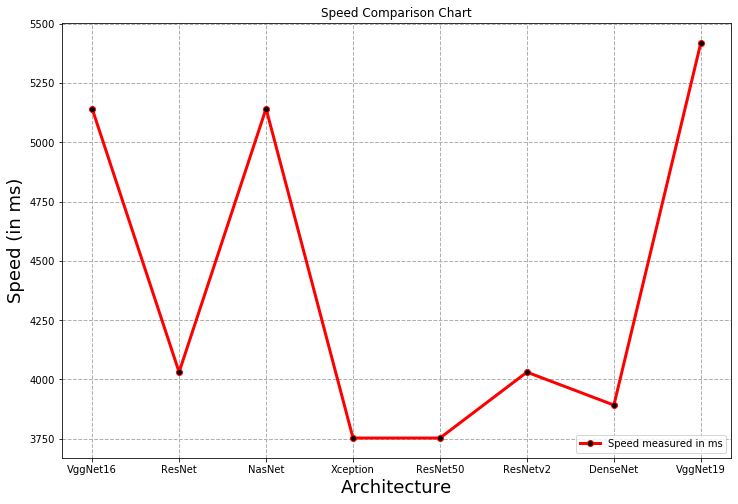

In [7]:
speed = df['Speed']
accuracy = df['Accuracy']
architectures = df['Architecture']
plt.figure(figsize=(12,8))
plt.title("Speed Comparison Chart")
plt.plot(architectures, speed, marker = 'o', color = 'red', markerfacecolor = 'black', linewidth = 3
        , label='Speed measured in ms')
plt.xticks(architectures)
plt.legend(loc="lower right")
plt.grid(True, linewidth= 1, linestyle="--")
plt.xlabel("Architecture", fontsize=18)
plt.ylabel("Speed (in ms)", fontsize=18)
plt.show()

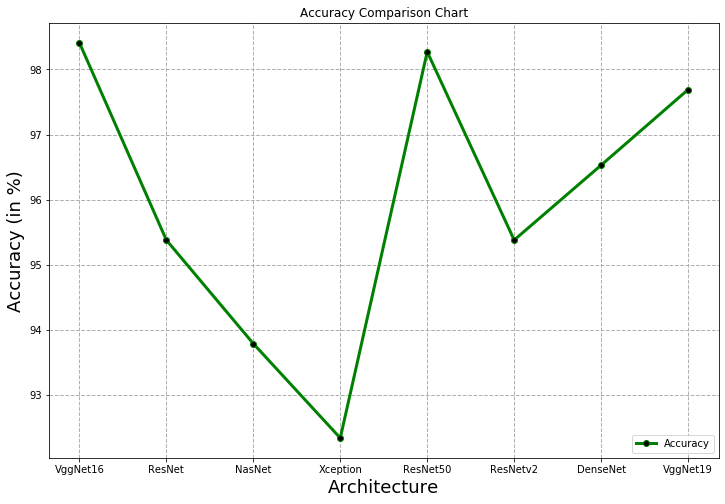

In [8]:
speed = df['Speed']
accuracy = df['Accuracy']
architectures = df['Architecture']
plt.figure(figsize=(12,8))
plt.title("Accuracy Comparison Chart")
plt.plot(architectures, accuracy, marker = 'o', color = 'green', markerfacecolor = 'black', linewidth = 3
        , label='Accuracy')
plt.xticks(architectures)
plt.legend(loc="lower right")
plt.xlabel("Architecture", fontsize=18)
plt.grid(True, linewidth= 1, linestyle="--")
plt.ylabel("Accuracy (in %)", fontsize=18)
plt.show()